<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex01_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%EC%88%98%ED%95%99%EC%84%B1%EC%A0%81_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# 텐서플로우 설치 확인
import tensorflow as tf
print(tf.__version__) # 던더 (더블 언더바)

2.13.0


In [63]:
# 드라이브 마운트
# mount() : 장치를 특정한 위치에 연결해주는 함수
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# 단축키 정리
# 기존 셀 위에 신규 셀 만들기 : ctrl + M + A
# 기존 셀 아래에 신규 셀 만들기 : ctrl + M + B
# 기존 셀 삭제 : ctrl + M + D
# 마크다운 전환 ctrl + M + M
# 셀로 전환 : ctrl + M + Y
# 자동 완성 : ctrl + space

# 목표
  - 학생 수학 성적을 예측하는 회귀 모델을 만들어보자.
  - keras 를 이용해서 신경망을 구성하는 방법을 알아보자.

In [65]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [66]:
# 데이터 로드 (데이터가 , 로 구분된 파일을 불러오기)
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/student-mat.csv')
data
# G3 : 정답으로 사용할 컬럼

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [67]:
# 컬럼 옵션 설정 : 전체 컬럼 출력
pd.set_option('display.max_columns',None)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# 문제, 정답 분리

In [69]:
# 문제와 정답을 분리해주는 라이브러리 import : 사이킷런
from sklearn.model_selection import train_test_split

In [70]:
# 데이터의 컬럼 확인하기
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [71]:
# 문제와 정답 분리하기 (특성은 1개만 사용 : 컬럼 하나만 가져오기)
# 문제로 가져오는 특성은 studytime
# 정답 : G3
X=data['studytime'] # 공부시간
y=data['G3'] # 수학성적

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [73]:
# shape 로 데이터 확인해보기
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((276,), (119,), (276,), (119,))

# 신경망 모델 만들기
- 1. 신경망 구조 설계
- 2. 신경망 학습이랑 평가 방법 설정
- 3. 학습 및 학습 과정 시각화
- 4. 모델 평가 및 예측

In [74]:
# 1. 신경망 구조 설계
# Sequential : 신경망의 뼈대를 구축하기 위한 함수
# 각각의 층을 선형으로 연결해주는 역할을 한다.
from tensorflow.keras import Sequential
# Dense : 신경망의 층 (뉴런의 묶음) 을 구성하는 함수
# Activation : 활성화를 설정하는 함수 (활성화 함수)
from tensorflow.keras.layers import Dense, Activation

In [75]:
# 딥러닝은 퍼셉트론 위에 숨겨진 퍼셉트론 층을 차곡차곡 쌓아주는 형태
# => Sequential 함수를 통해서 쉽게 구현이 가능하다.

model=Sequential() # 인공 신경망 뼈대 생성

# 입력층 설정 => 데이터가 입력되는 층
# add : 층을 쌓아줄때 사용하는 함수
# Dense : 층의 구조를 결정하는 함수
# input_dim = 30 : 입력할 특성의 갯수

# 입력층 설정
# unit = 노드 (뉴런) 의 갯수
model.add(Dense(units=4,input_dim=1))
model.add(Activation('sigmoid'))

# 출력층 설정
# add : 층을 쌓아줄때 사용하는 함수
# Dense : 층의 구조를 결정하는 함수
# () 안의 숫자는 하나의 층에 생성해줄 총 뉴런의 갯수
# 값이 1개만 출력되도록 만들어보자
model.add(Dense(units=1))
# 이번 회귀에서는 별도의 활성화 함수 X
# 활성화 함수가 적용되지 않으면 기본 linear 의 형태

# 모델 요약 및 출력
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 8         
                                                                 
 activation_18 (Activation)  (None, 4)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# 2. complie : 학습 / 평가 방법 설정
# compile() 함수는 앞서 만든 모델이 효과적으로 구현될 수 있도록
# 환경을 설정하는 부분 => 컴파일도 함께 진행이 된다.
# 모델을 학습시키기 전에 손실함수 / 최적화 방법 / 평가지표를 설정하는 부분
model.compile(loss='mse', # 손실함수 : mse (평균제곱오차) 모델이 예측한 값과 실제값 사이의 차이를 계산하는 함수
              optimizer='SGD' # 최적화 함수 (확률적 경사 하강법) : 최적화 방법을 설정하는 부분
                              # : 경사하강법 이외에 다양한 알고리즘이 존재
              )

In [77]:
# 3. 모델 학습
# fit()
# epochs : 학습을 얼마나 반복 할 것인가?
h=model.fit(X_train,y_train,epochs=300)

Epoch 1/300
9/9 [==============================] - 0s 3ms/step - loss: 93.3639
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 43.1303
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 27.0320
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 22.9964
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 21.7683
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 21.5165
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 21.4348
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 21.4714
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 21.4191
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 21.4197
Epoch 11/300
9/9 [==============================] - 0s 3ms/step - loss: 21.4067
Epoch 12/300
9/9 [==============================] - 0s 2ms/step - loss: 21.4291
Epoch 13/300
9/9 [==============================]

In [78]:
# 4. 모델 평가
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 19.4855


19.485504150390625

In [79]:
# 5. 모델 예측
model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


array([[ 9.619533],
       [10.363287],
       [10.363287],
       [ 9.619533],
       [ 9.619533],
       [10.363287],
       [ 9.619533],
       [10.363287],
       [ 9.619533],
       [ 9.619533],
       [10.363287],
       [10.363287],
       [ 9.619533],
       [ 9.619533],
       [10.980415],
       [10.773106],
       [10.773106],
       [10.363287],
       [10.363287],
       [10.363287],
       [10.363287],
       [ 9.619533],
       [10.363287],
       [10.363287],
       [10.980415],
       [10.363287],
       [10.773106],
       [10.363287],
       [10.363287],
       [ 9.619533],
       [10.363287],
       [10.363287],
       [10.363287],
       [ 9.619533],
       [10.980415],
       [10.773106],
       [10.363287],
       [10.773106],
       [ 9.619533],
       [ 9.619533],
       [10.363287],
       [ 9.619533],
       [ 9.619533],
       [ 9.619533],
       [10.980415],
       [10.773106],
       [10.363287],
       [ 9.619533],
       [10.773106],
       [10.363287],


# 입력 특성이 2 개인 모델을 직접 만들어보자
- 문제 (입력특성 2 개 : studytime, traveltime : X)
- 정답 (G3 : y)
- 최종 출력의 뉴런 개수는 1

In [80]:
# 문제와 정답 추출하기
# 문제데이터를 추출할때 2 차원으로 인덱싱을 해와야 한다.
X=data[['studytime','traveltime']]
y=data['G3']

In [81]:
# 훈련데이터 / 평가데이터로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=555)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((276, 2), (119, 2), (276,), (119,))

In [82]:
# 1. 신경망 구조 설계

# 뼈대 설정
model1=Sequential()

# 입력층 설정 (입력받는 특성은 2 개, 뉴런의 갯수는 4 개)
model1.add(Dense(units=4,input_dim=2))

# 입력층 활성화 : 시그모이드
model1.add(Activation('sigmoid'))

# 중간층 설정 (뉴런의 갯수는 2 개)
model1.add(Dense(units=2,activation='sigmoid'))

# 중간층 활성화 : 시그모이드
# model1.add(Activation('sigmoid'))

# 출력층 설정 (뉴런의 갯수 1 개)
model1.add(Dense(units=1))

# 모델 요약
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 12        
                                                                 
 activation_19 (Activation)  (None, 4)                 0         
                                                                 
 dense_37 (Dense)            (None, 2)                 10        
                                                                 
 dense_38 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# 2. 모델 컴파일 : 학습 / 평가 방법 설정
# 손실함수 (loss) = 'mse'
# 최적화 함수 (optimizer) = 'SGD'
model1.compile(loss='mse',optimizer='SGD')

In [84]:
# 3. 모델 학습 (반복횟수는 300)
h2=model1.fit(X_train,y_train,epochs=300)

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 88.3183
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 48.9322
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 31.1269
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 24.8471
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 22.7440
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 22.1874
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 22.0364
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 21.9403
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 21.9191
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 21.9176
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 21.9343
Epoch 12/300
9/9 [==============================] - 0s 2ms/step - loss: 21.9578
Epoch 13/300
9/9 [==============================]

In [85]:
# 4. 모델 평가
model1.evaluate(X_test,y_test,)

4/4 [==============================] - 0s 3ms/step - loss: 19.0835


19.083467483520508

In [86]:
# 5. 모델 예측
model1.predict(X_test)

4/4 [==============================] - 0s 3ms/step


array([[10.682473],
       [ 9.435518],
       [ 8.804025],
       [11.039429],
       [11.039429],
       [11.039429],
       [10.036003],
       [ 9.173542],
       [11.039429],
       [10.682473],
       [ 8.712783],
       [11.039429],
       [ 8.90258 ],
       [11.136888],
       [11.039429],
       [10.036003],
       [ 9.435518],
       [10.036003],
       [ 9.435518],
       [10.473602],
       [10.473602],
       [11.039429],
       [11.039429],
       [10.036003],
       [11.375936],
       [11.375936],
       [ 9.173542],
       [ 9.435518],
       [ 9.435518],
       [11.039429],
       [11.039429],
       [11.375936],
       [11.136888],
       [ 9.435518],
       [11.039429],
       [11.039429],
       [10.473602],
       [10.036003],
       [11.375936],
       [11.039429],
       [11.039429],
       [10.473602],
       [11.039429],
       [10.036003],
       [10.682473],
       [10.036003],
       [10.682473],
       [11.039429],
       [10.036003],
       [11.553945],


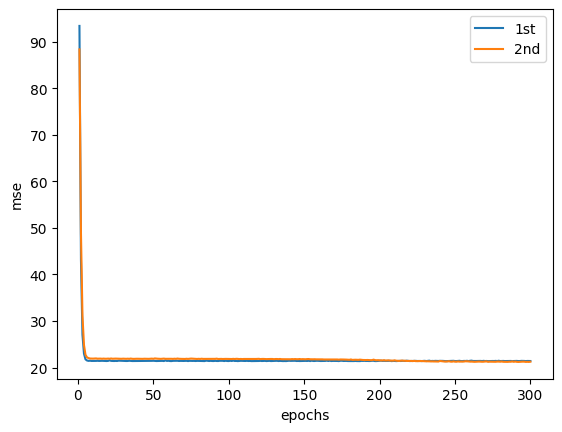

In [87]:
# 손실함수 시각화
plt.plot(range(1,301),h.history['loss'],label='1st')
plt.plot(range(1,301),h2.history['loss'],label='2nd')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.show()